In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("drive/My Drive/datascience/alumni_project")
!ls

cleaned_skills_df.csv  skill_cleaned_with_emsi_dataset.csv
emsi_skills.csv        skills_translated.csv
Skill_cleaned.csv


In [4]:
skill_df = pd.read_csv('skill_cleaned_with_emsi_dataset.csv')
skill_df['Skill_cleaned']=skill_df['Skill_cleaned'].apply(lambda x: list(eval(x)))
skill_df['subcategoryName']=skill_df['subcategoryName'].apply(lambda x: list(eval(x)))
skill_df['categoryName']=skill_df['categoryName'].apply(lambda x: list(eval(x)))

In [5]:
skill_df.head(3)

,Unnamed: 0,Name,Skills,Skill_English,Skill_cleaned,subcategoryName,categoryName
0,0,0064692b7bc52326414c8f9c2bfe0445,"{'Programming', 'Computational Modeling', 'Neu...","['Literature Reviews', 'Computational Modeling...","[Electrophysiology, Computer Programming, Arti...","[Statistical Software, Molecular, Cellular, an...","[Science and Research, Health Care, Analysis, ..."
1,1,00b11a3e2e7ad34edddea58da8c29836,"{'Microsoft Outlook', 'Basecamp', 'Fundraising...","['Salesforce.com Administration', 'Google Suit...","[Salesforce Development, Social Media Marketin...","[Fundraising and Crowdsourcing, Social Media, ...","[Business, Science and Research, Hospitality a..."
2,2,00b1a8c869074d20e1dac21d3662e82f,"{'Linux', 'Laboratoire', 'Recherche', 'Python'}","['Research', 'Laboratory', 'Python', 'Linux']","[Research, Linux, Medical Laboratory, Python (...","[Scripting Languages, Research Methodology, Op...","[Science and Research, Information Technology]"


In [6]:
total_skills = []
for i in range(skill_df.shape[0]):
  total_skills.extend(skill_df.loc[i,'Skill_cleaned'])
total_skills = list(set(total_skills))

In [7]:
len(total_skills)

1380

In [8]:
total_subcategory = []
for i in range(skill_df.shape[0]):
  total_subcategory.extend(skill_df.loc[i,'subcategoryName'])
total_subcategory = list(set(total_subcategory))
len(total_subcategory)

290

In [9]:
total_category = []
for i in range(skill_df.shape[0]):
  total_category.extend(skill_df.loc[i,'categoryName'])
total_category = list(set(total_category))
len(total_category)

32

Get word embedding


In [10]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.2 MB/s eta 0:00:00


In [11]:
pip install -U sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=5b77057cb81fdadc445e94c0a56bf6e9024c00bd2df48fb53b241cbc9ae72596
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [12]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted","python"]

nlp_encoder_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = nlp_encoder_model.encode(sentences)
embeddings.shape

(3, 384)

In [13]:
skill_embeddings = nlp_encoder_model.encode(total_skills)

In [14]:
subcategory_embeddings = nlp_encoder_model.encode(total_subcategory)

In [15]:
category_embeddings = nlp_encoder_model.encode(total_category)

# Clustering

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [17]:
standardized_skill = StandardScaler().fit_transform(skill_embeddings.astype(float))
print(standardized_skill.shape)

(1380, 384)


In [18]:
standardized_subcategory = StandardScaler().fit_transform(subcategory_embeddings.astype(float))
print(standardized_subcategory.shape)

(290, 384)


In [19]:
standardized_category = StandardScaler().fit_transform(category_embeddings.astype(float))
print(standardized_category.shape)

(32, 384)


In [20]:
from sklearn import cluster,mixture




In [21]:
skill_cluster_num = 4
kmeans = cluster.KMeans(n_clusters=skill_cluster_num)
ward = cluster.AgglomerativeClustering(n_clusters=skill_cluster_num, linkage="ward")
spectral = cluster.SpectralClustering(
  n_clusters=skill_cluster_num,
  eigen_solver="arpack",
  affinity="nearest_neighbors",
  )
kmeans.fit(standardized_skill)
ward.fit(standardized_skill)
spectral.fit(standardized_skill)



SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=4)

In [22]:
from sklearn import metrics
kmeans_score = metrics.silhouette_score(
            standardized_skill,
            kmeans.labels_,
            metric="euclidean")
ward_score = metrics.silhouette_score(
            standardized_skill,
            ward.labels_,
            metric="euclidean")
spectral_score = metrics.silhouette_score(
            standardized_skill,
            spectral.labels_,
            metric="euclidean")



In [23]:
name = ['kmeans','ward','spectral']
scores = [kmeans_score,ward_score,spectral_score]
compare_df = pd.DataFrame(list(zip(name, scores)),columns=['name','silhouette_score'])
compare_df

,name,silhouette_score
0,kmeans,0.029980
1,ward,0.017178
2,spectral,0.023626


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Skill Clustering Algorithm Comparision')

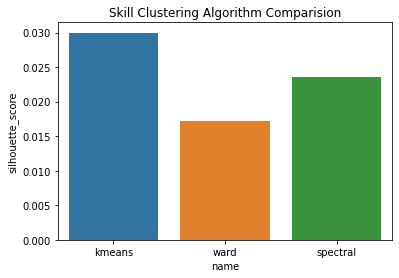

In [28]:
sns.barplot(data=compare_df, x="name", y="silhouette_score")
plt.title("Skill Clustering Algorithm Comparision")

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


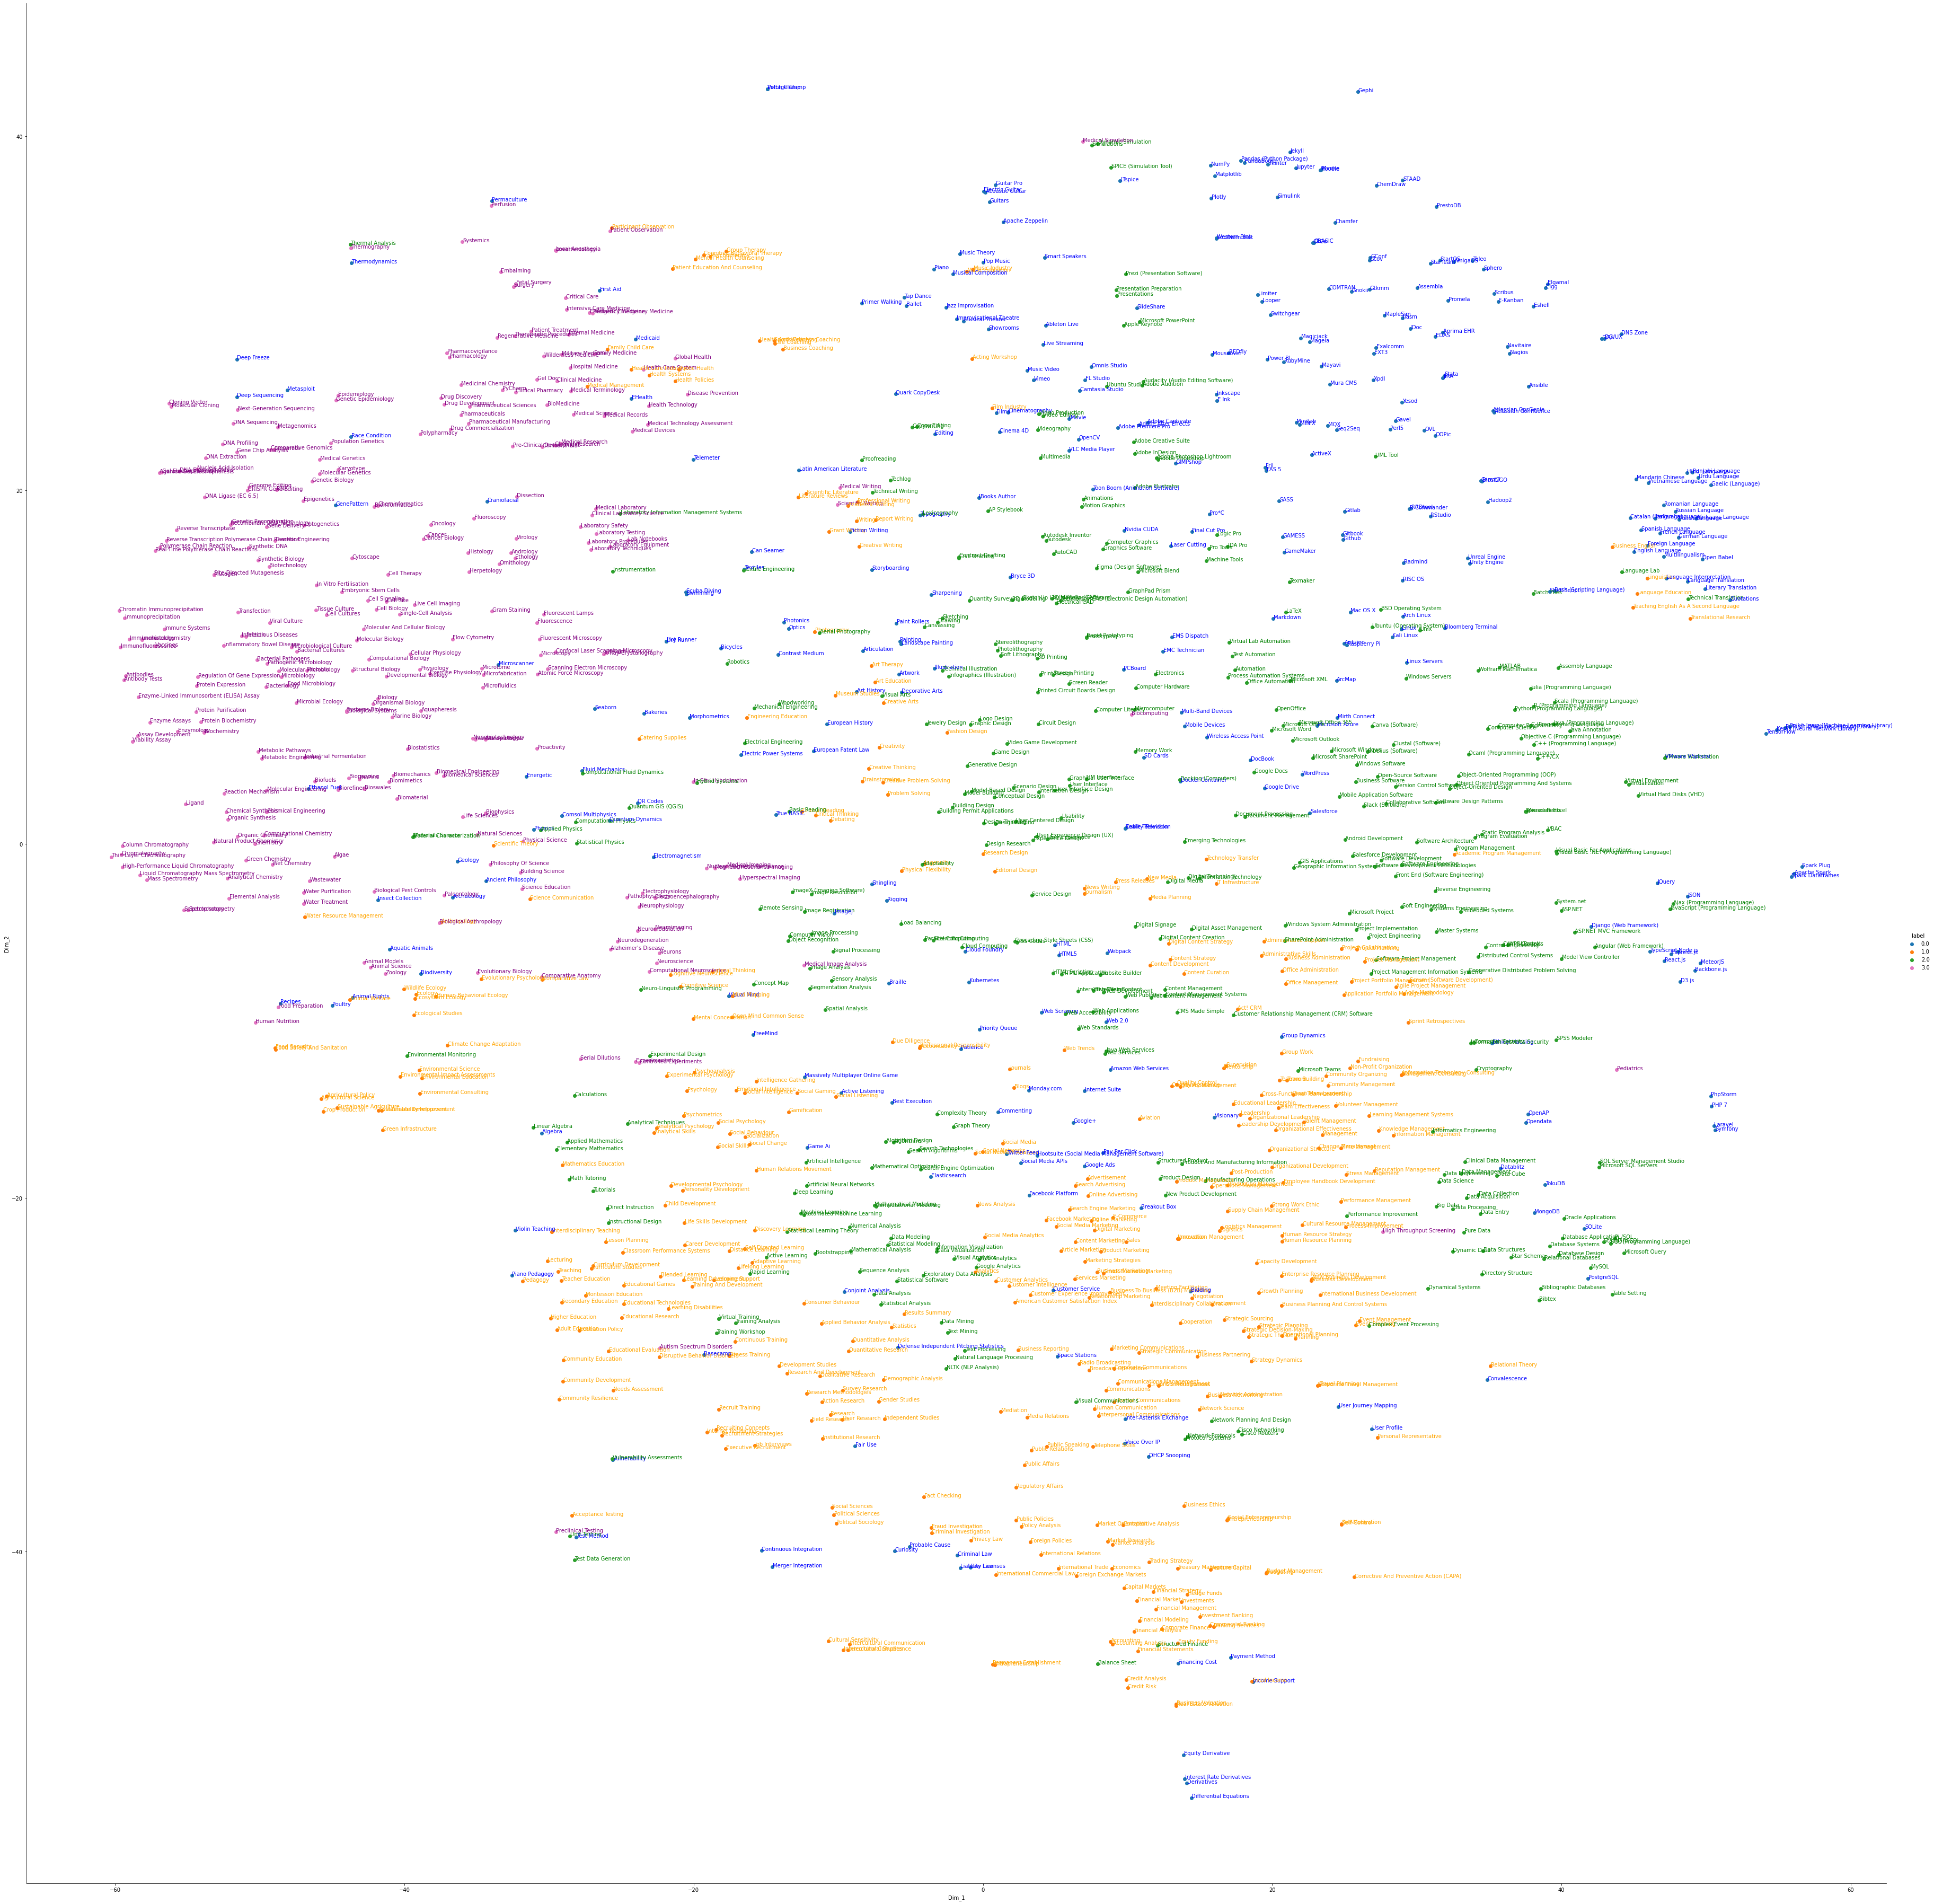

In [31]:
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
model = TSNE(n_components=2, random_state=0) 

tsne_data = model.fit_transform(standardized_skill)
# Creating a new data frame which helps us in ploting the result data
clustered_tsne_data = np.vstack((tsne_data.T, kmeans.labels_)).T
tsne_df = pd.DataFrame(data=clustered_tsne_data, columns=("Dim_1", "Dim_2", "label"))
palette = {
    0: 'tab:blue',
    1: 'tab:orange',
    2: 'tab:green',
    3: 'tab:pink',}
# Ploting the result of tsne
ax = sns.FacetGrid(tsne_df,  hue="label", height=6, size=50,palette=palette).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Use size if height results in warning.
def label_point(x, y, val,label, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val,'label':label}, axis=1)
    for i, point in a.iterrows():
      if point['label']==0:
        ax.text(point['x']+.02, point['y'], str(point['val']),color='blue')
      elif point['label']==1:
        ax.text(point['x']+.02, point['y'], str(point['val']),color='orange')
      elif point['label']==2:
        ax.text(point['x']+.02, point['y'], str(point['val']),color='green')
      elif point['label']==3:
        ax.text(point['x']+.02, point['y'], str(point['val']),color='purple')

label_point(tsne_df.Dim_1, tsne_df.Dim_2, pd.Series(total_skills),tsne_df['label'], plt.gca()) 
plt.show()

In [30]:
skill_cluster_num = 4
kmeans = cluster.KMeans(n_clusters=skill_cluster_num)
ward = cluster.AgglomerativeClustering(n_clusters=skill_cluster_num, linkage="ward")
spectral = cluster.SpectralClustering(
  n_clusters=skill_cluster_num,
  eigen_solver="arpack",
  affinity="nearest_neighbors",
  )
kmeans.fit(standardized_skill)
ward.fit(standardized_skill)
spectral.fit(standardized_skill)



SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=4)